In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
#read raw data
df = pd.read_csv(r'C:\Users\User\Desktop\msp22059 C-07\msp22059 C-07\1_eda\datasets\(raw)Weekly_data_1.5.csv')
df.head()

week  future_return     volume  inventory     amount    BASIS  \
0     1            NaN  10.976047   8.185907  10.976047  59.2680   
1     2      -0.056701  13.400486  10.345831  13.400486  31.7160   
2     3      -0.028819  13.474156  10.799555  13.474156  34.6024   
3     4      -0.042739  13.527370  10.820138  13.527370  57.0780   
4     5      -0.048364  14.049264  11.179381  14.049264  16.1712   

   index_turnover_rate  short_balance_ratio   pli  t_spread        RSI  \
0                0.440             0.000005  0.00   2.04740   0.000000   
1                0.658             0.000010  0.20   2.01880  52.442353   
2                0.490             0.000027  0.20   1.97462  18.350791   
3                0.500             0.000028  0.25   1.94245  17.038370   
4                0.468             0.000056  0.60   1.89940  48.441850   

   index_trading_volume  CCt+1  
0              6.510794    0.0  
1              8.499683    0.0  
2              8.218636    0.0  
3              7.993090    0.0  
4              8.089973    1.0

In [48]:
#check nan value in data
df.isnull().sum()

week                    0
future_return           1
volume                  0
inventory               0
amount                  0
BASIS                   0
index_turnover_rate     0
short_balance_ratio     0
pli                     0
t_spread                0
RSI                     0
index_trading_volume    0
CCt+1                   1
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week                  652 non-null    int64  
 1   future_return         651 non-null    float64
 2   volume                652 non-null    float64
 3   inventory             652 non-null    float64
 4   amount                652 non-null    float64
 5   BASIS                 652 non-null    float64
 6   index_turnover_rate   652 non-null    float64
 7   short_balance_ratio   652 non-null    float64
 8   pli                   652 non-null    float64
 9   t_spread              652 non-null    float64
 10  RSI                   652 non-null    float64
 11  index_trading_volume  652 non-null    float64
 12  CCt+1                 651 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 66.3 KB


In [50]:
#count how many CCt+1 == 0
df[df['CCt+1'] == 0].count()


week                    528
future_return           527
volume                  528
inventory               528
amount                  528
BASIS                   528
index_turnover_rate     528
short_balance_ratio     528
pli                     528
t_spread                528
RSI                     528
index_trading_volume    528
CCt+1                   528
dtype: int64

In [51]:
df[df['CCt+1'] == 1].count()


week                    123
future_return           123
volume                  123
inventory               123
amount                  123
BASIS                   123
index_turnover_rate     123
short_balance_ratio     123
pli                     123
t_spread                123
RSI                     123
index_trading_volume    123
CCt+1                   123
dtype: int64

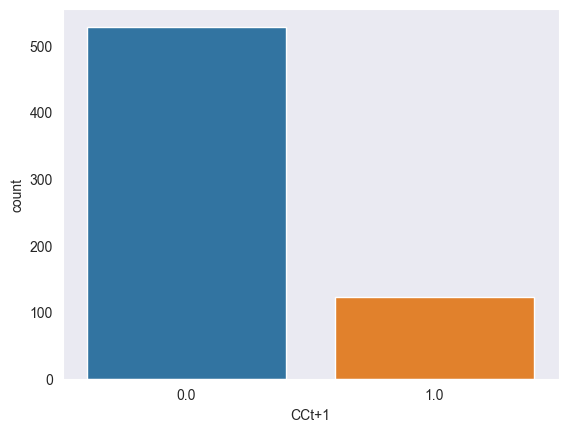

In [52]:
#plot CCt+1 count plot with number on the bin top
sns.countplot(x="CCt+1", data=df)
plt.show()


In [53]:
print('Percent of fraud transaction: ',len(df[df['CCt+1']==1])/len(df['CCt+1'])*100,"%")

Percent of fraud transaction:  18.865030674846626 %


In [54]:
#univariate analysis without week 
df.drop(['week'], axis=1).describe()


future_return      volume   inventory      amount       BASIS  \
count     651.000000  652.000000  652.000000  652.000000  652.000000   
mean        0.000195   13.350687   12.889745   13.350687   -8.402610   
std         0.027945    1.444134    0.761162    1.444134   28.911996   
min        -0.222283    9.014325    8.185907    9.014325 -353.150333   
25%        -0.012952   12.135342   12.245586   12.135342  -17.671075   
50%         0.001133   13.331771   13.021572   13.331771   -3.319400   
75%         0.015916   14.400114   13.606349   14.400114    5.082271   
max         0.117596   16.422424   14.043919   16.422424   91.457600   

       index_turnover_rate  short_balance_ratio         pli    t_spread  \
count           652.000000           652.000000  652.000000  652.000000   
mean              0.515855             0.033911    0.517229    0.791938   
std               0.342474             0.047231    0.232607    0.365177   
min               0.158000             0.000005    0.000000   -0.210760   
25%               0.327500             0.006613    0.400000    0.558505   
50%               0.424000             0.013465    0.600000    0.748075   
75%               0.562500             0.028256    0.600000    0.984020   
max               2.512000             0.213129    1.000000    2.047400   

              RSI  index_trading_volume       CCt+1  
count  652.000000            652.000000  651.000000  
mean    51.418457              8.683882    0.188940  
std     25.256708              0.780547    0.391762  
min      0.000000              6.206515    0.000000  
25%     33.080686              8.132763    0.000000  
50%     50.200947              8.663530    0.000000  
75%     69.011539              9.298937    0.000000  
max    100.000000             10.568039    1.000000

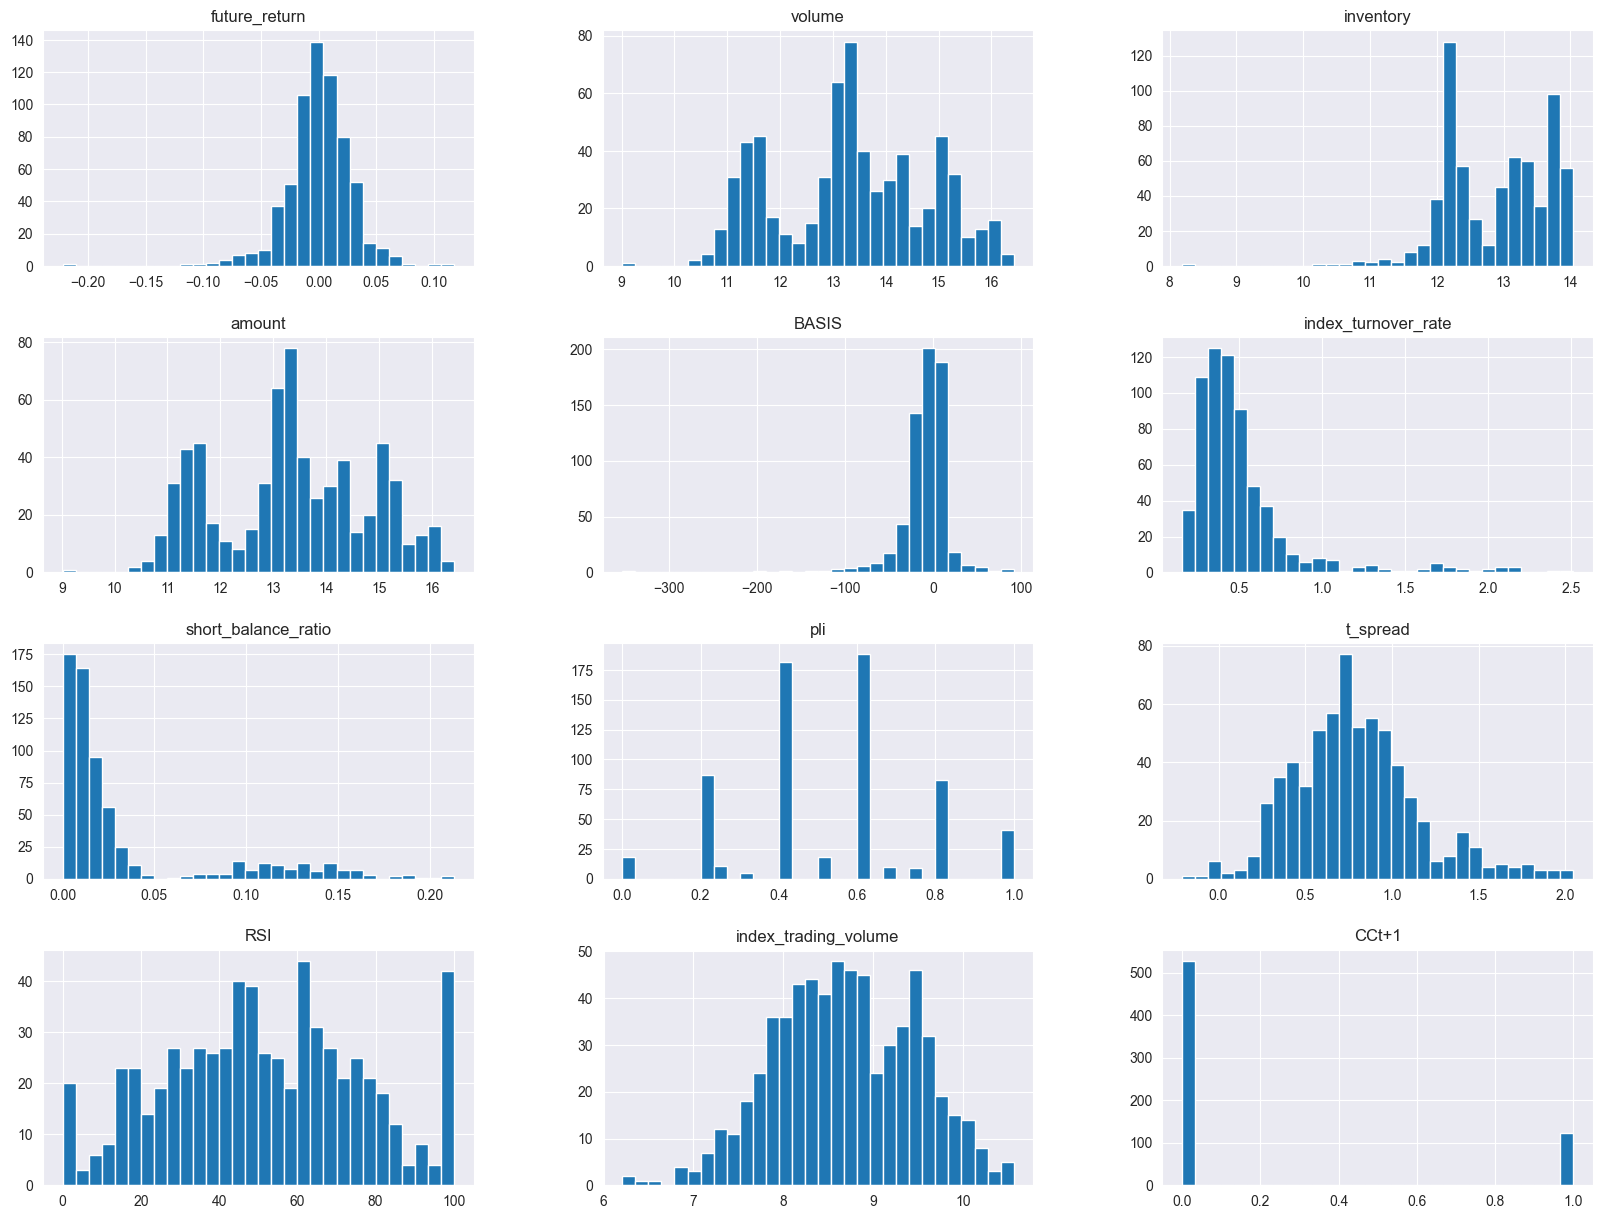

In [55]:
#histogram of all features without week, use thin bar to see the distribution
df.drop(['week'], axis=1).hist(bins=30, figsize=(20,15))
plt.show()


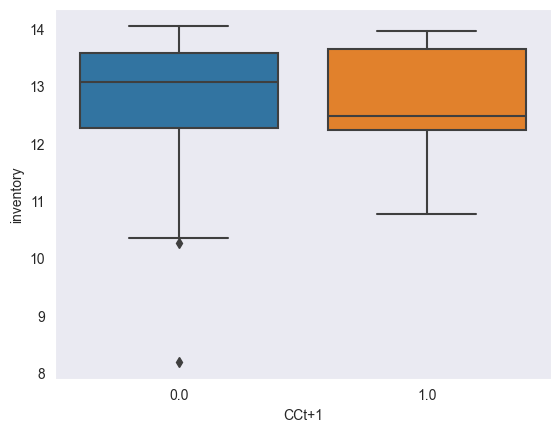

In [56]:
#Future Inventory and risk coefficient bivariate analysis
#use other bivariate analysis to see the relationship between inventory and CCt+1
sns.boxplot(x="CCt+1", y="inventory", data=df)


plt.show()


<AxesSubplot:xlabel='inventory', ylabel='CCt+1'>

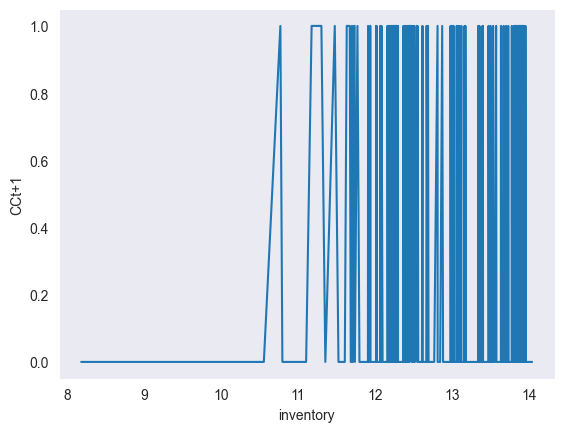

In [57]:
#line plot for inventory and CCt+1
sns.lineplot(x="inventory", y="CCt+1", data=df)

<AxesSubplot:xlabel='inventory', ylabel='CCt+1'>

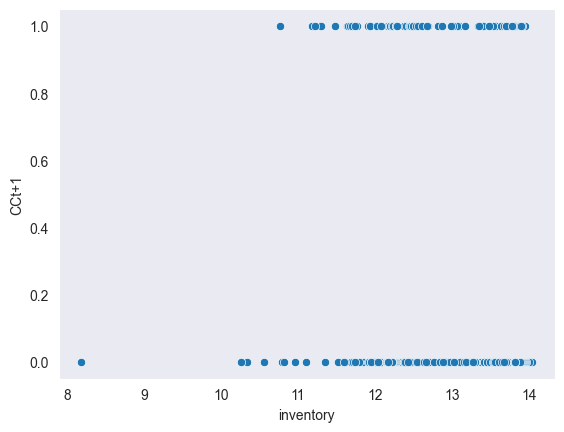

In [58]:
#Scatter plot for inventory and CCt+1
sns.scatterplot(x="inventory", y="CCt+1", data=df)

<AxesSubplot:xlabel='inventory', ylabel='CCt+1'>

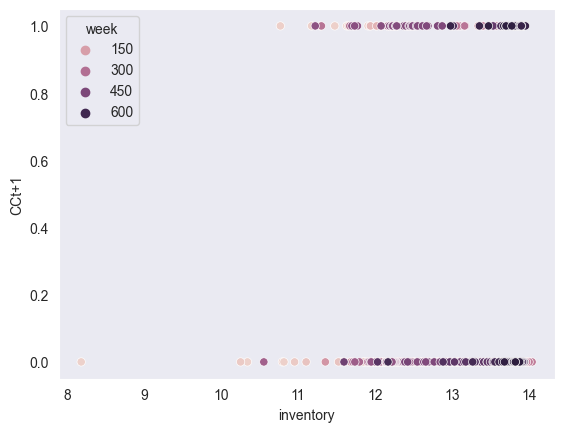

In [59]:
#scatterplot for inventory and CCt+1 with hue = week
sns.scatterplot(x="inventory", y="CCt+1", hue="week", data=df)

<AxesSubplot:xlabel='short_balance_ratio', ylabel='CCt+1'>

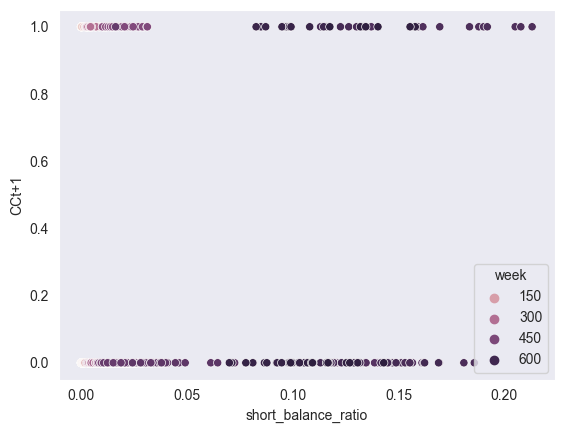

In [60]:
#scatterplot for inventory and CCt+1 with hue = week
sns.scatterplot(x="short_balance_ratio", y="CCt+1", hue="week", data=df)

<AxesSubplot:xlabel='index_turnover_rate', ylabel='CCt+1'>

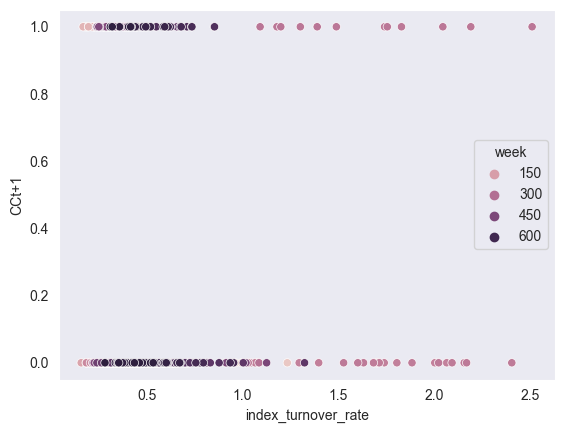

In [61]:
#scatterplot for inventory and CCt+1 with hue = week
sns.scatterplot(x="index_turnover_rate", y="CCt+1", hue="week", data=df)

<AxesSubplot:xlabel='short_balance_ratio', ylabel='index_turnover_rate'>

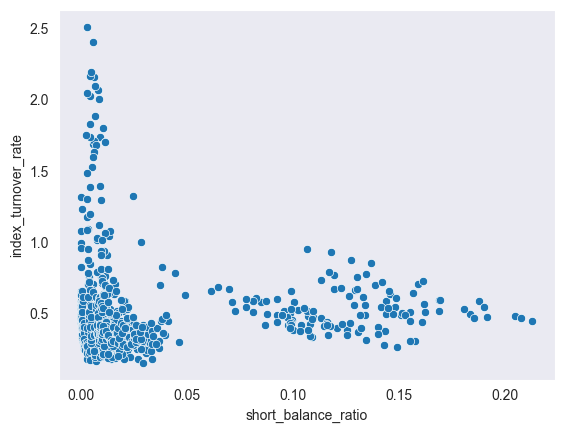

In [62]:
#bivariate analysis between Index Turnover Ratio and Short Balance Ratio
sns.scatterplot(x="short_balance_ratio", y="index_turnover_rate", data=df)

<AxesSubplot:xlabel='BASIS', ylabel='CCt+1'>

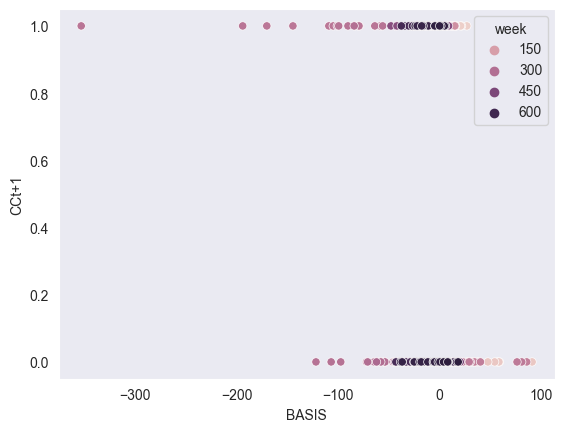

In [63]:
#scatterplot for inventory and CCt+1 with hue = week
sns.scatterplot(x="BASIS", y="CCt+1", hue="week", data=df)

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


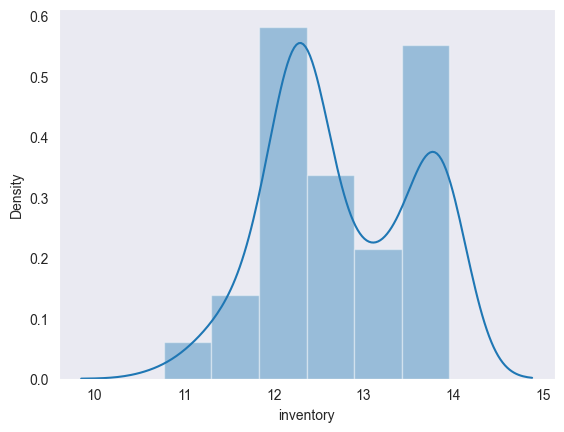

In [64]:
sns.distplot(df[df['CCt+1'] ==1].inventory)
#label the legend
plt.show()

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


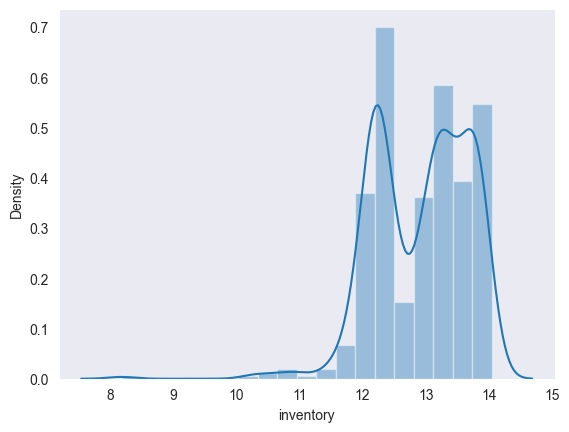

In [65]:
sns.distplot(df[df['CCt+1'] ==0].inventory)
plt.show()

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


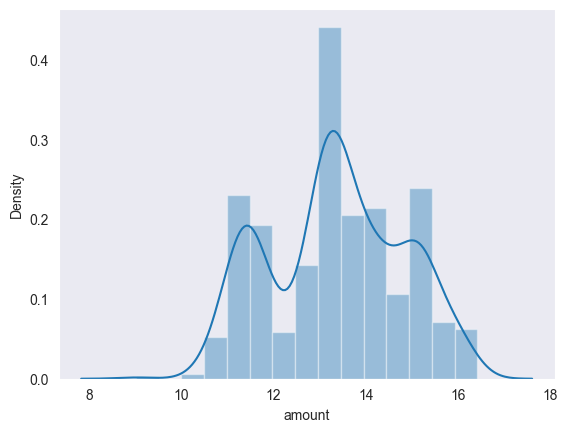

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


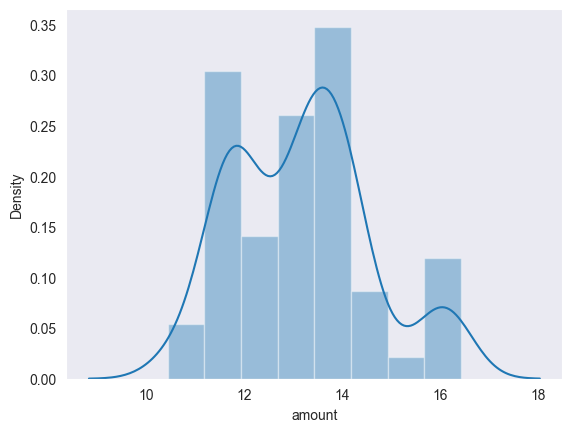

In [66]:
sns.distplot(df.amount)
plt.show()
sns.distplot(df[df['CCt+1'] ==1].amount)
plt.show()

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


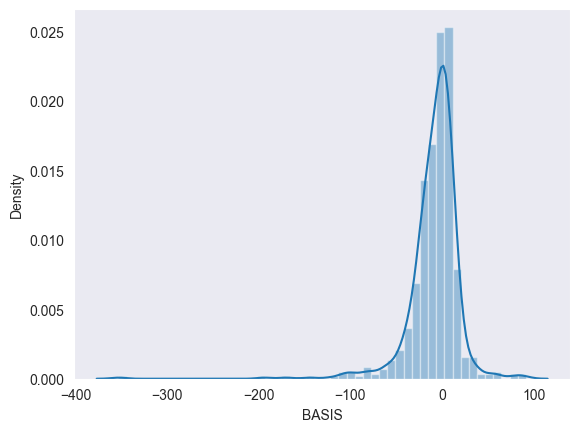

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


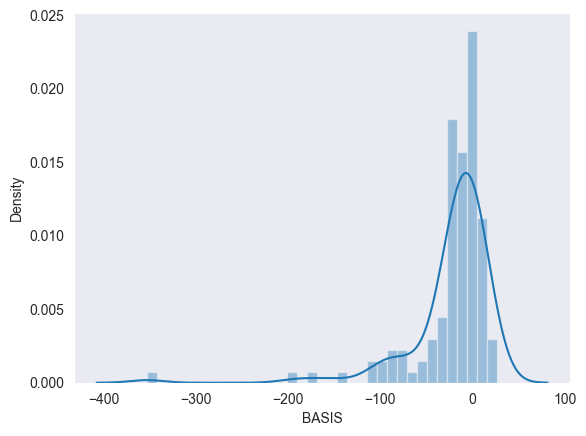

In [67]:
sns.distplot(df.BASIS)
plt.show()
sns.distplot(df[df['CCt+1'] ==1].BASIS)
plt.show()

In [68]:
#check which variables are significant
df.corr()
# the higher the corr value, the more significant the variable is
# the corr value of 1 means the two variables are perfectly correlated
# the corr value of -1 means the two variables are perfectly negatively correlated
# the corr value of 0 means the two variables are not correlated


week  future_return    volume  inventory    amount  \
week                  1.000000       0.015356 -0.409042   0.538716 -0.409042   
future_return         0.015356       1.000000 -0.012782   0.054297 -0.012782   
volume               -0.409042      -0.012782  1.000000   0.472760  1.000000   
inventory             0.538716       0.054297  0.472760   1.000000  0.472760   
amount               -0.409042      -0.012782  1.000000   0.472760  1.000000   
BASIS                -0.223041       0.227209  0.211070   0.003091  0.211070   
index_turnover_rate   0.031348       0.170139  0.331608   0.272078  0.331608   
short_balance_ratio   0.705469      -0.023718 -0.047038   0.576848 -0.047038   
pli                   0.013410       0.398398 -0.021003   0.004520 -0.021003   
t_spread             -0.167792      -0.108358  0.191849  -0.119017  0.191849   
RSI                   0.004263       0.492881  0.014971   0.019404  0.014971   
index_trading_volume  0.640481       0.115834 -0.036127   0.558295 -0.036127   
CCt+1                 0.102168      -0.272713 -0.060362  -0.082488 -0.060362   

                         BASIS  index_turnover_rate  short_balance_ratio  \
week                 -0.223041             0.031348             0.705469   
future_return         0.227209             0.170139            -0.023718   
volume                0.211070             0.331608            -0.047038   
inventory             0.003091             0.272078             0.576848   
amount                0.211070             0.331608            -0.047038   
BASIS                 1.000000            -0.102193            -0.026142   
index_turnover_rate  -0.102193             1.000000            -0.035636   
short_balance_ratio  -0.026142            -0.035636             1.000000   
pli                  -0.012926             0.170950            -0.025820   
t_spread              0.049241             0.092069             0.000915   
RSI                   0.080767             0.134671            -0.047059   
index_trading_volume -0.217837             0.665768             0.449629   
CCt+1                -0.238317             0.014759             0.127351   

                           pli  t_spread       RSI  index_trading_volume  \
week                  0.013410 -0.167792  0.004263              0.640481   
future_return         0.398398 -0.108358  0.492881              0.115834   
volume               -0.021003  0.191849  0.014971             -0.036127   
inventory             0.004520 -0.119017  0.019404              0.558295   
amount               -0.021003  0.191849  0.014971             -0.036127   
BASIS                -0.012926  0.049241  0.080767             -0.217837   
index_turnover_rate   0.170950  0.092069  0.134671              0.665768   
short_balance_ratio  -0.025820  0.000915 -0.047059              0.449629   
pli                   1.000000 -0.088779  0.480093              0.111562   
t_spread             -0.088779  1.000000 -0.076443             -0.023830   
RSI                   0.480093 -0.076443  1.000000              0.070987   
index_trading_volume  0.111562 -0.023830  0.070987              1.000000   
CCt+1                -0.165117  0.175096 -0.147218              0.041548   

                         CCt+1  
week                  0.102168  
future_return        -0.272713  
volume               -0.060362  
inventory            -0.082488  
amount               -0.060362  
BASIS                -0.238317  
index_turnover_rate   0.014759  
short_balance_ratio   0.127351  
pli                  -0.165117  
t_spread              0.175096  
RSI                  -0.147218  
index_trading_volume  0.041548  
CCt+1                 1.000000

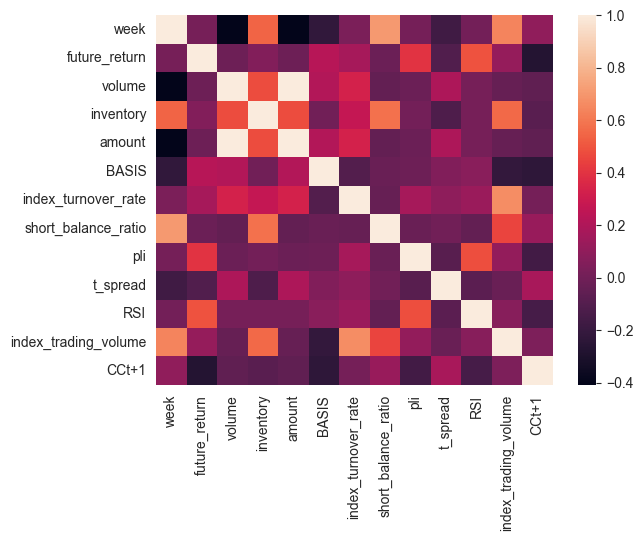

In [69]:
#plot the correlation matrix

corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

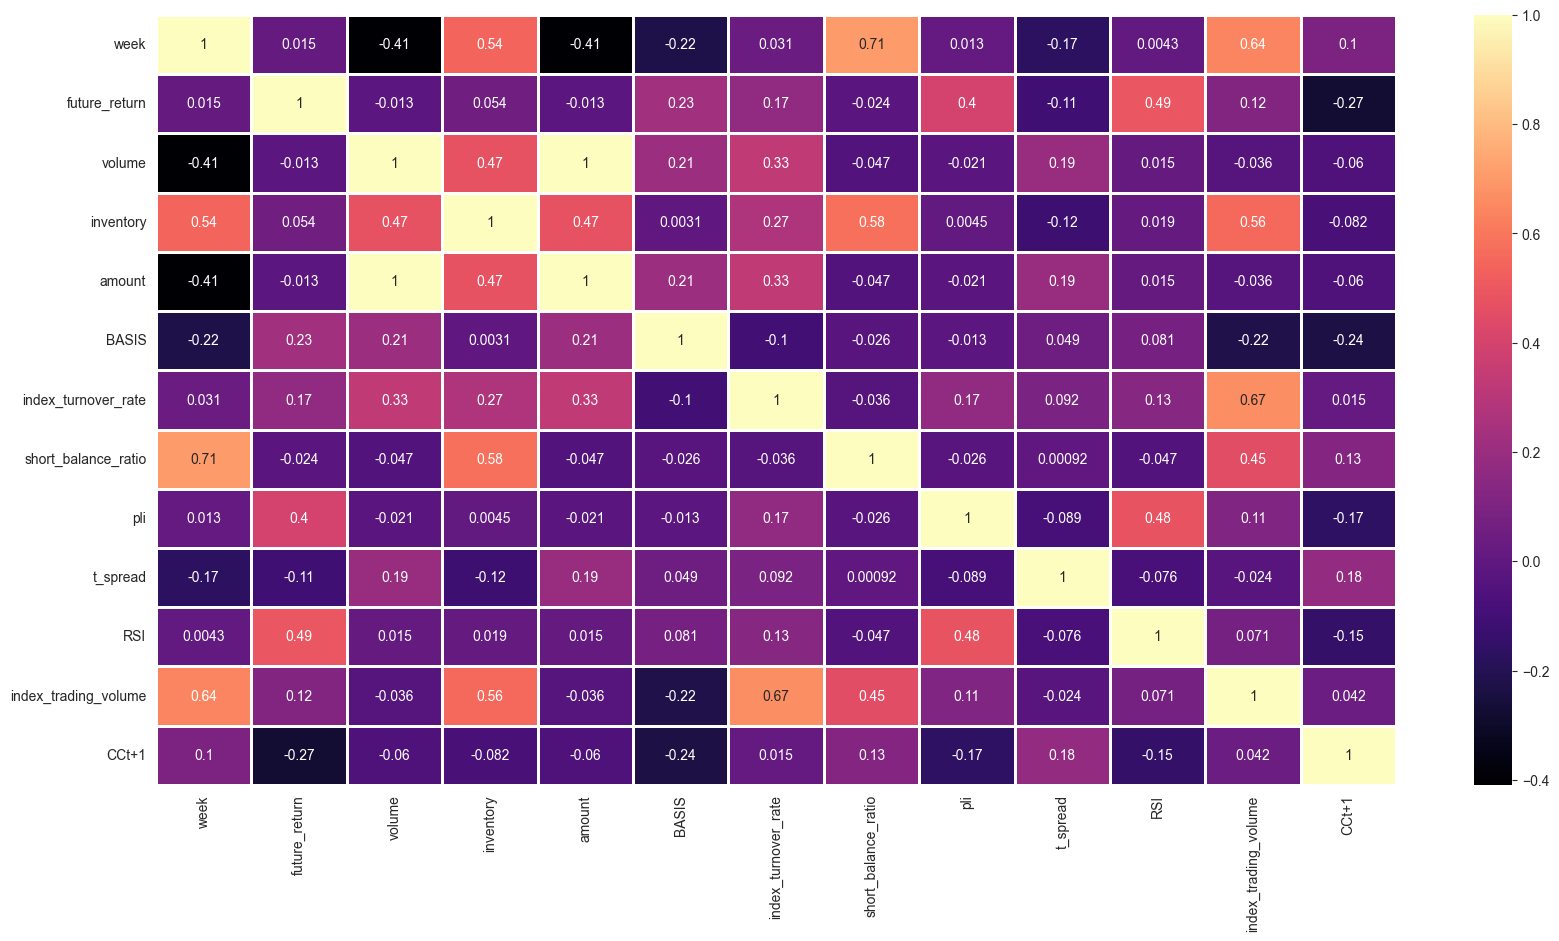

In [70]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

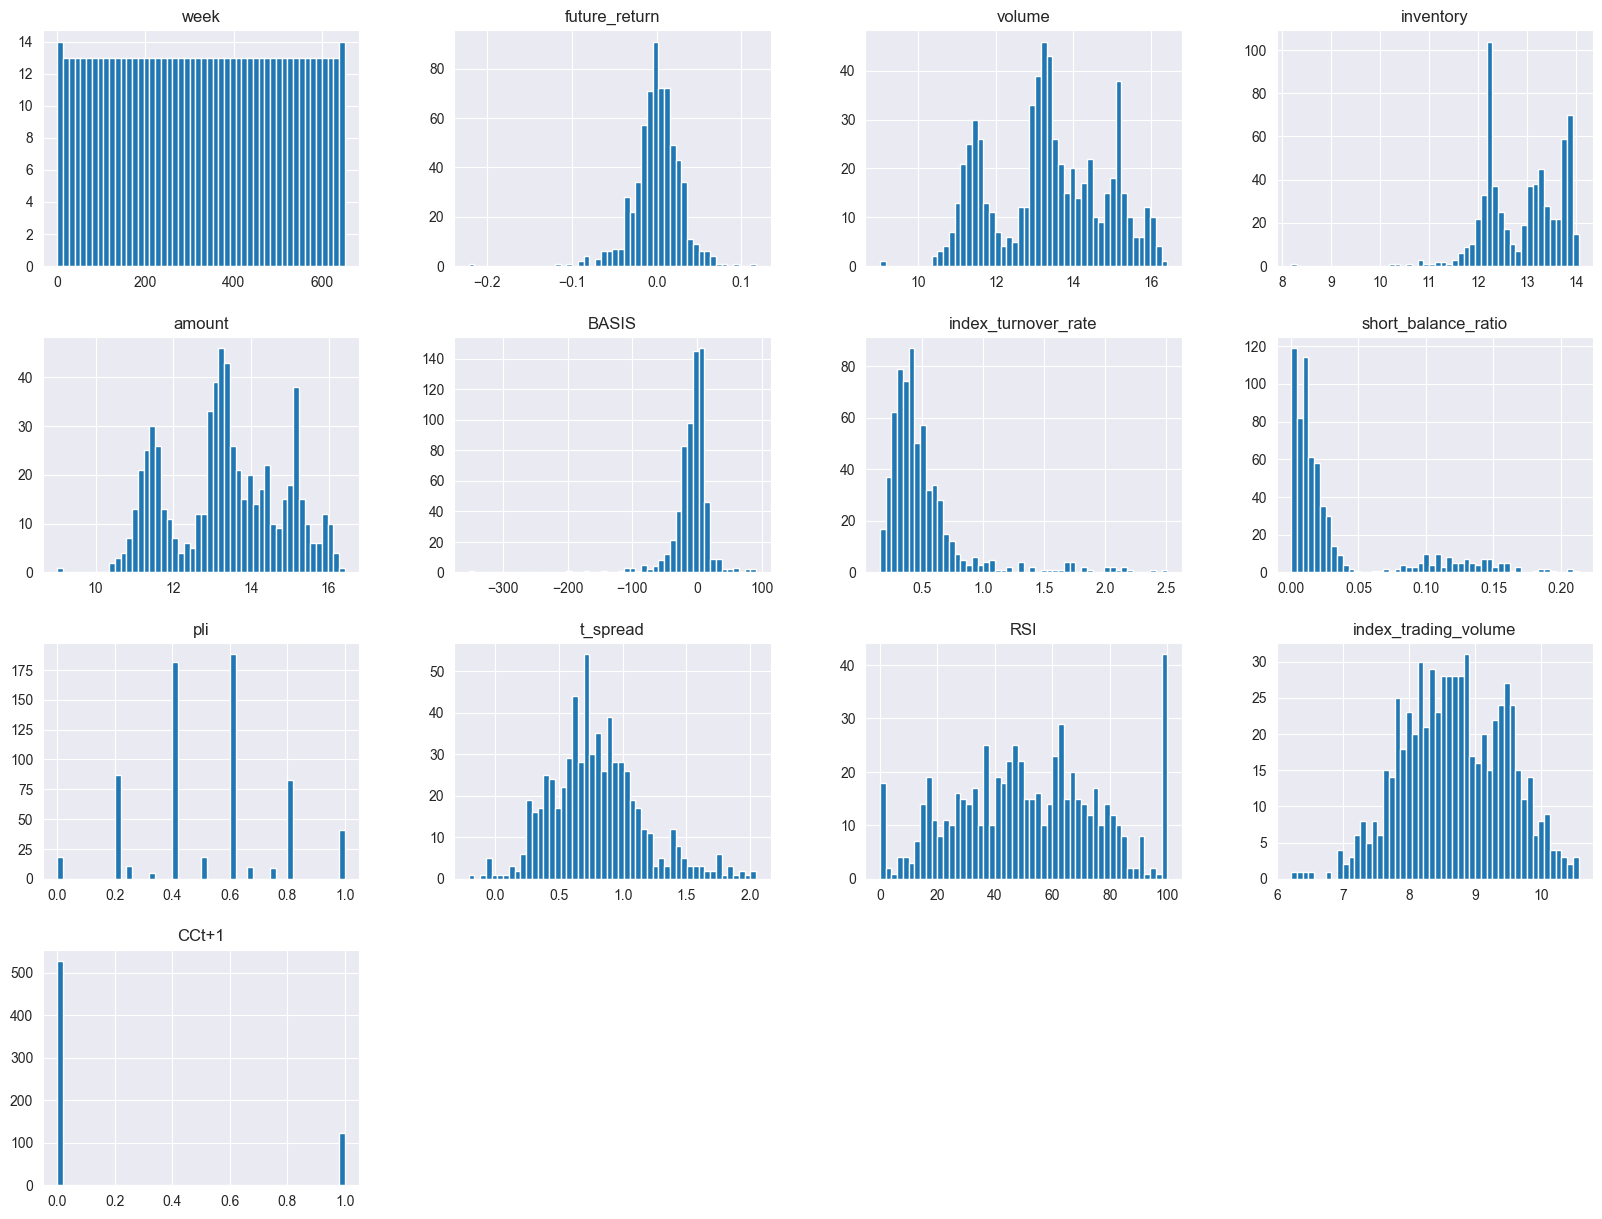

In [71]:
#EDA
#check the distribution of each variable

df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='volume', ylabel='BASIS'>

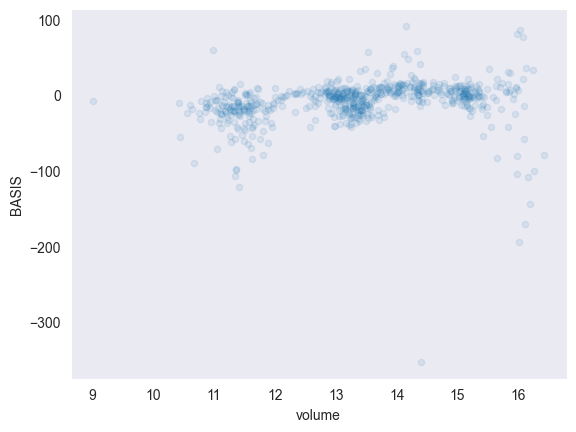

In [72]:
#multivariate analysis
#check the relationship between each variable and weekly sales
#scatter plot
df.plot(kind="scatter", x="volume", y="BASIS", alpha=0.1)
#how to read scatter plot
#the x axis is the volume, the y axis is the basis
#the alpha value is the transparency of the dots
#the darker the dots, the more dots there are
#the more dots there are, the more data points there are
#the more data points there are, the more significant the relationship is


<AxesSubplot:xlabel='volume', ylabel='amount'>

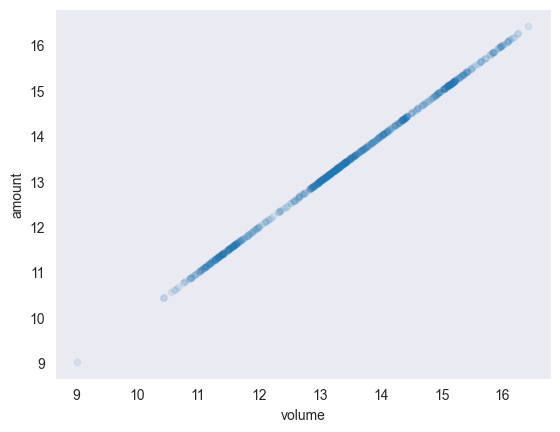

In [73]:
df.plot(kind="scatter", x="volume", y="amount", alpha=0.1)

<AxesSubplot:xlabel='short_balance_ratio', ylabel='inventory'>

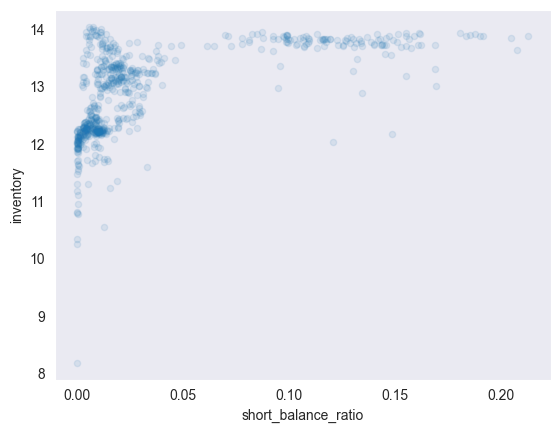

In [74]:
df.plot(kind="scatter", x="short_balance_ratio", y="inventory", alpha=0.1)

<AxesSubplot:xlabel='index_turnover_rate', ylabel='index_trading_volume'>

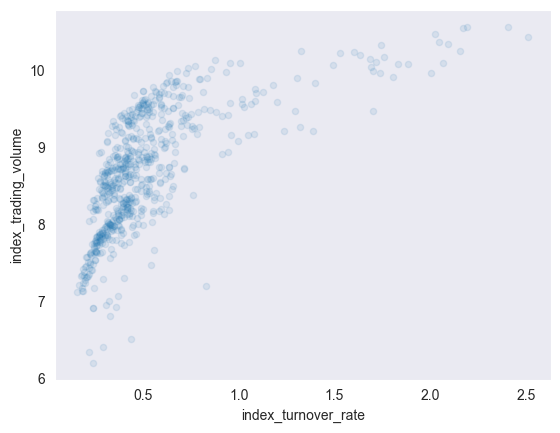

In [75]:

df.plot(kind="scatter", x="index_turnover_rate", y="index_trading_volume", alpha=0.1)

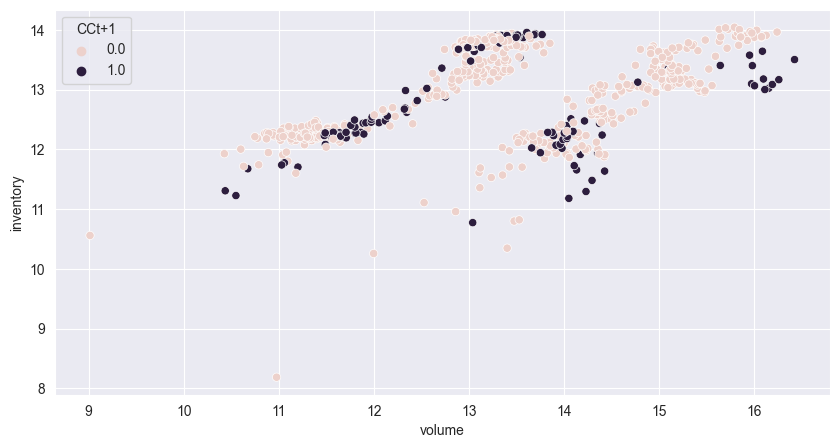

In [76]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="volume", y="inventory",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()


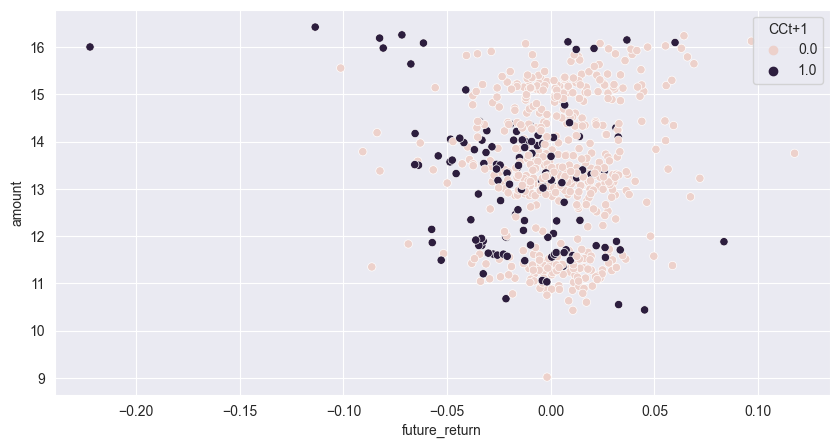

In [77]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="future_return", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()


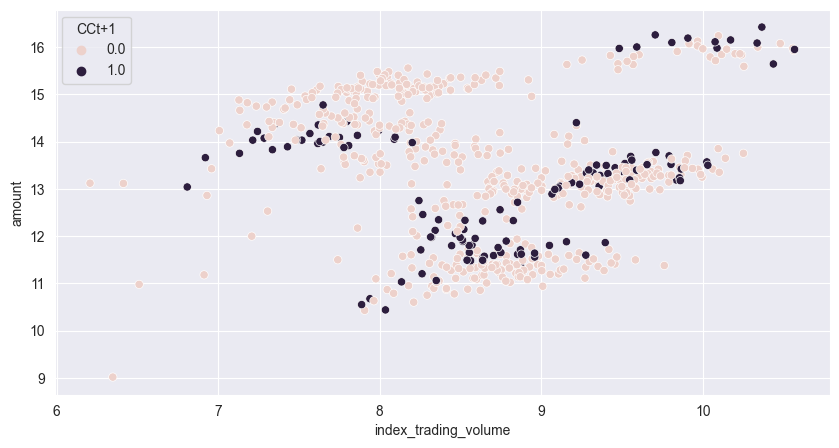

In [78]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="index_trading_volume", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

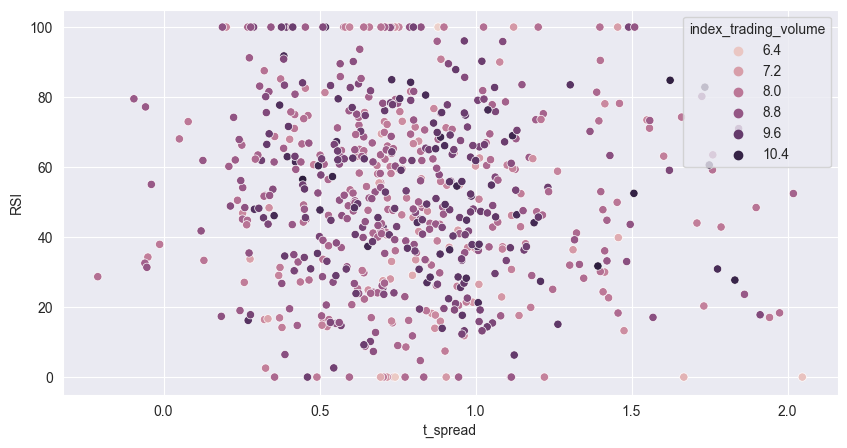

In [79]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="t_spread", y="RSI",
              hue="index_trading_volume",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

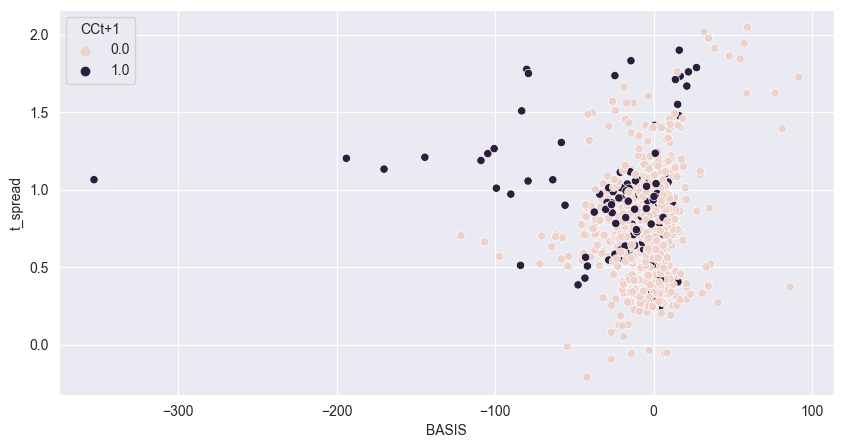

In [80]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="BASIS", y="t_spread",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

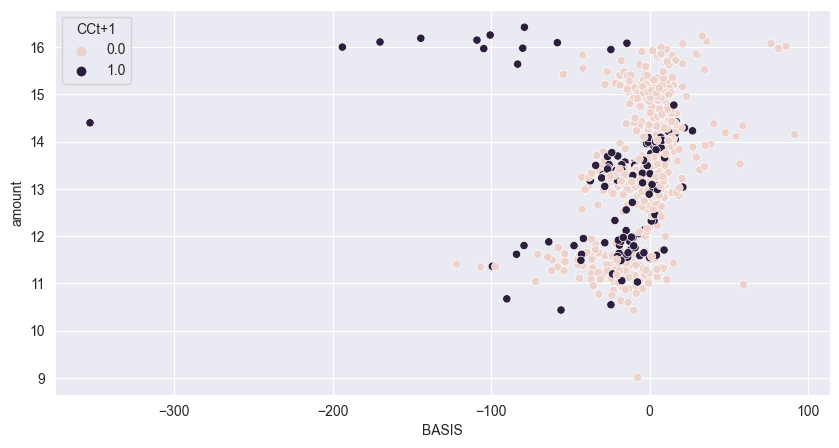

In [81]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="BASIS", y="amount",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

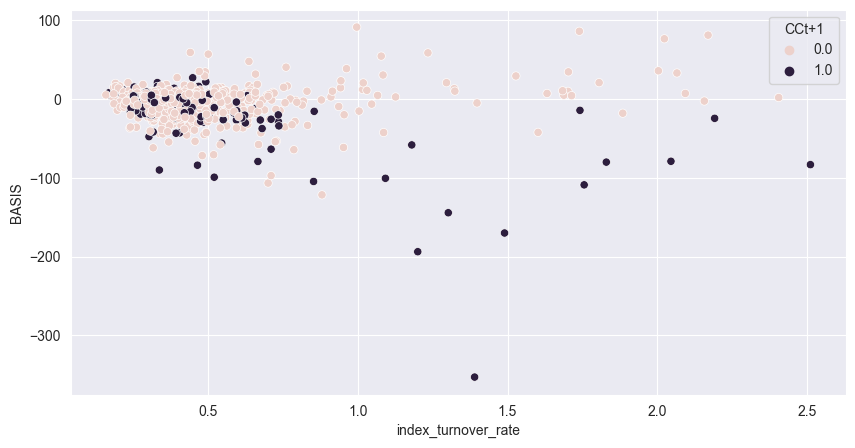

In [82]:
fig, ax = plt.subplots(figsize=[10,5])
sns.scatterplot(x="index_turnover_rate", y="BASIS",
              hue="CCt+1",
               #hue="Embarked", 
              data=df,ax=ax)
plt.grid()

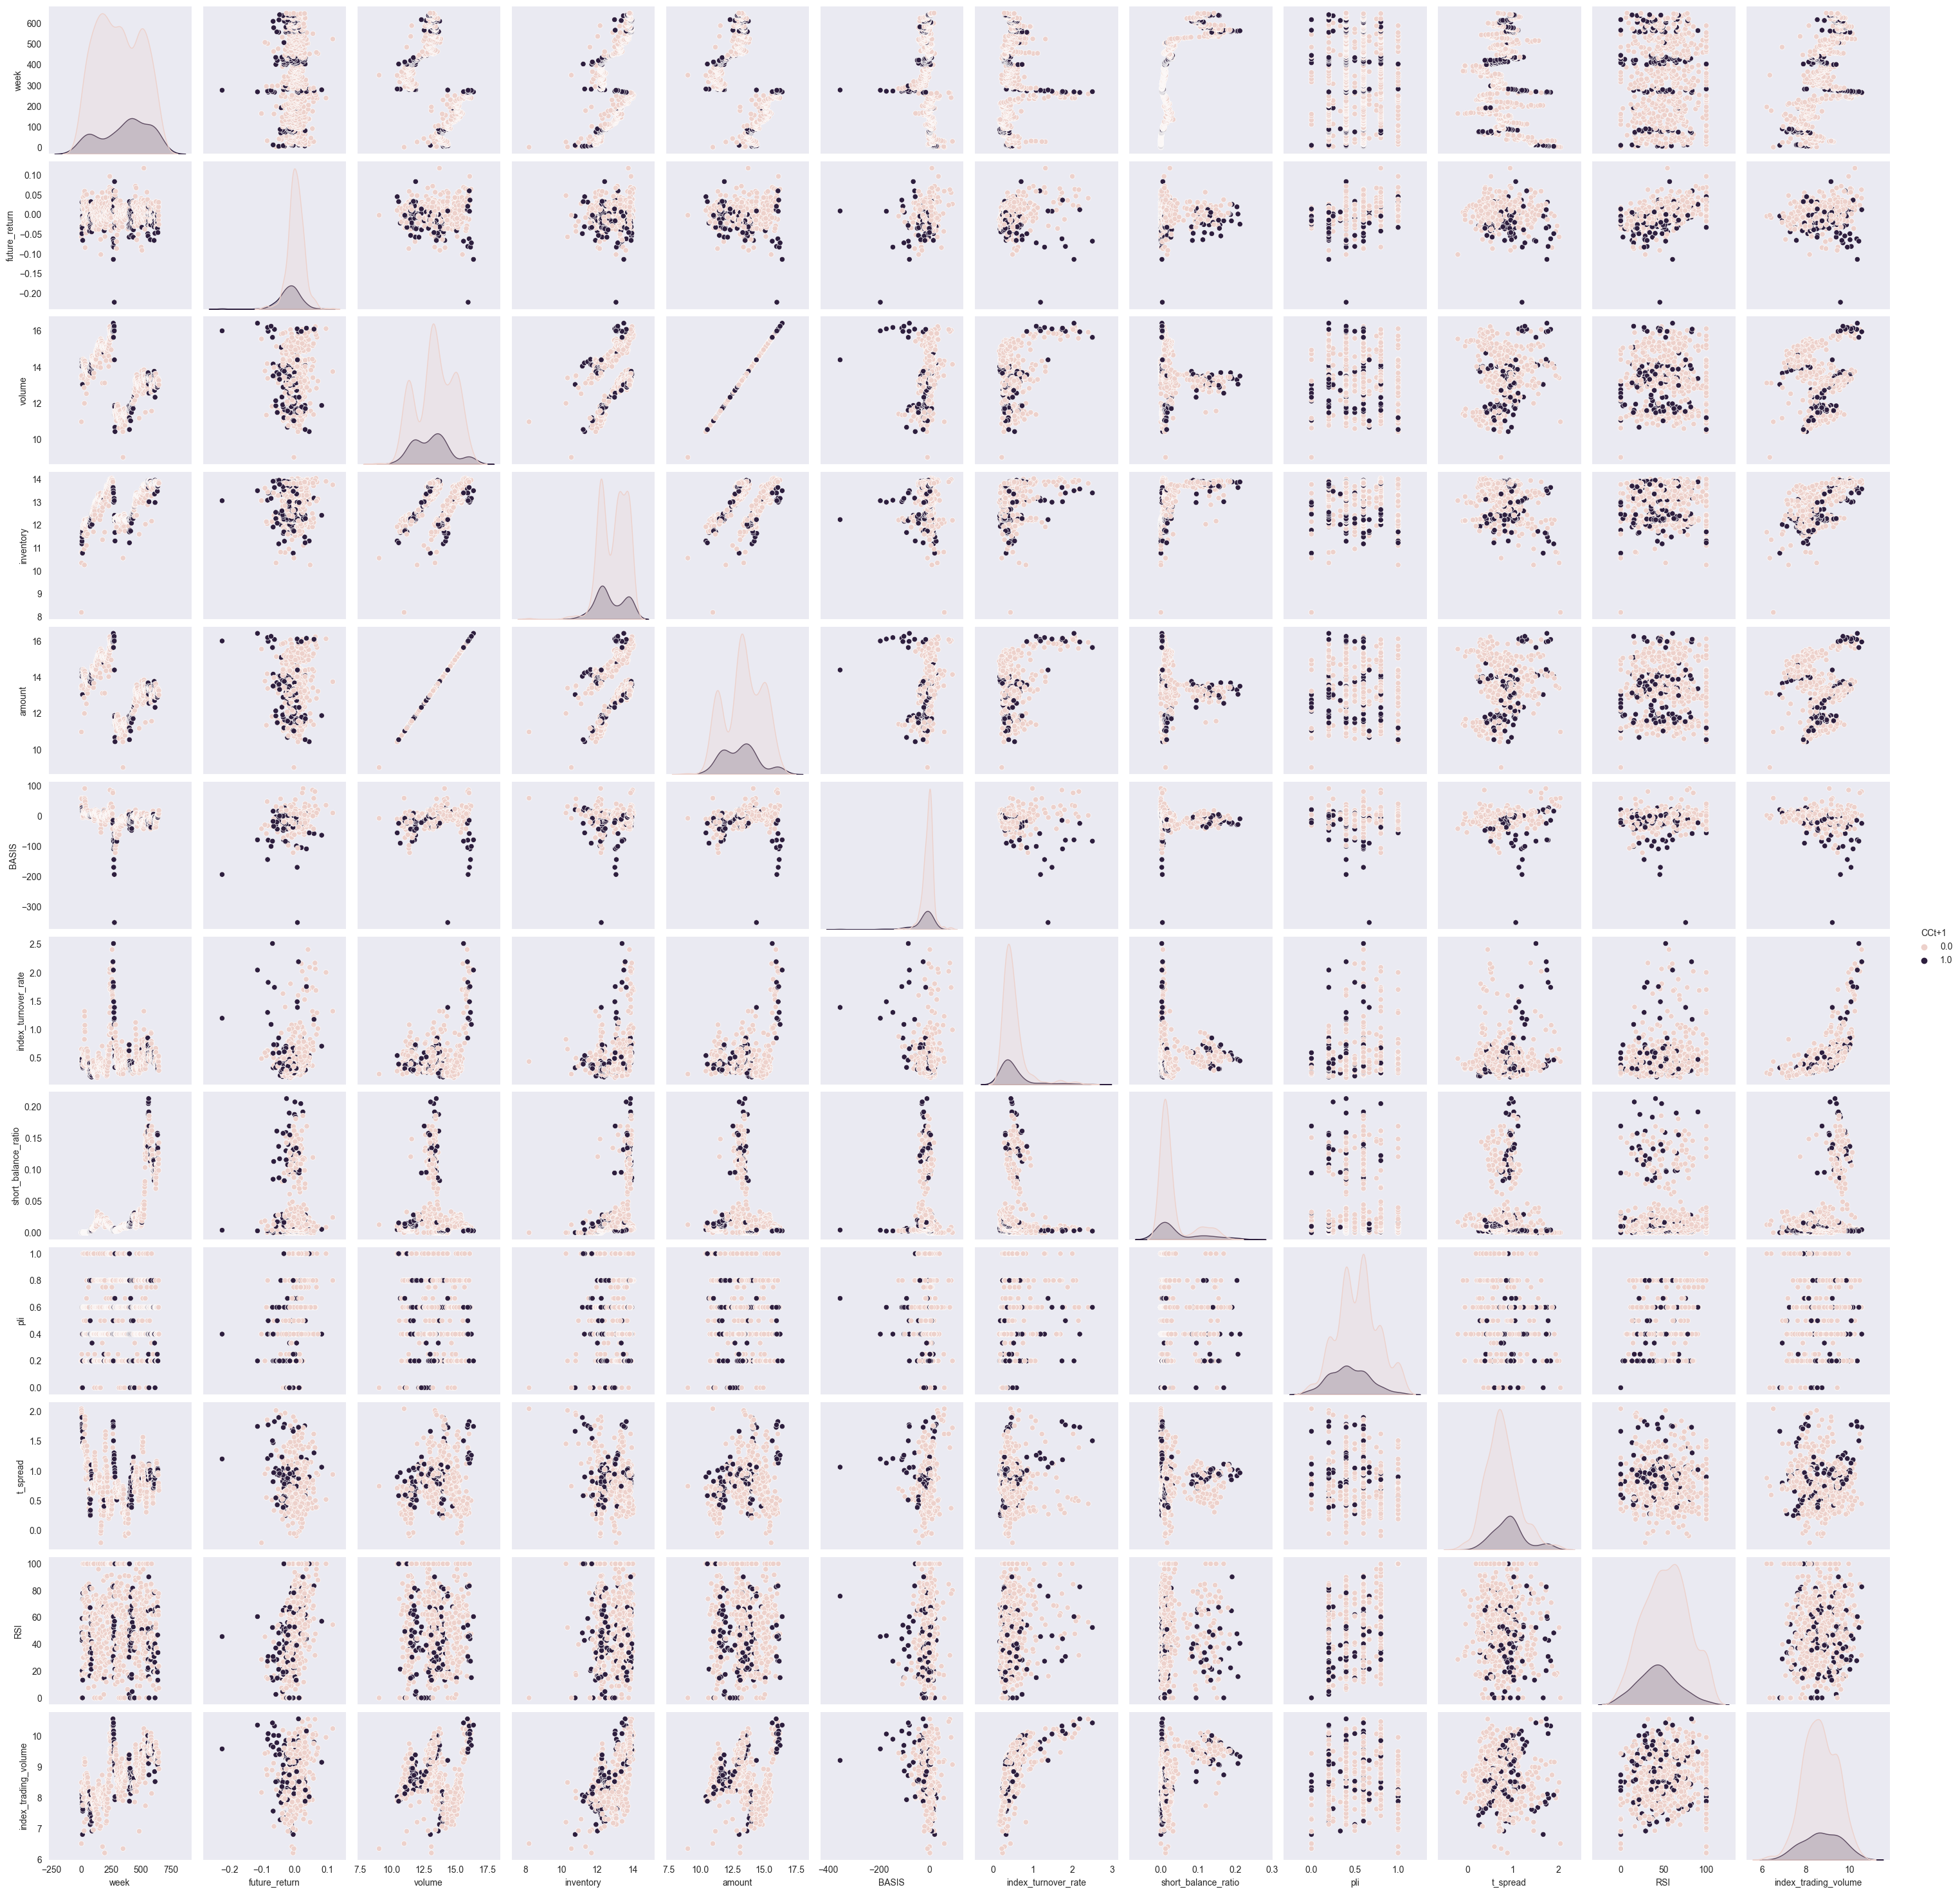

In [83]:
#combine all the scatter plots above together
sns.pairplot(df, hue="CCt+1", height=2.5)


In [84]:
df.pivot_table(df, index=["CCt+1"],  aggfunc='mean')

BASIS        RSI     amount  future_return  index_trading_volume  \
CCt+1                                                                         
0.0    -5.107864  53.197412  13.393738       0.003871              8.667847   
1.0   -22.703102  43.700204  13.171091      -0.015586              8.750684   

       index_turnover_rate  inventory       pli  short_balance_ratio  \
CCt+1                                                                  
0.0               0.513791  12.918594  0.535638             0.030844   
1.0               0.526698  12.758386  0.437534             0.046139   

       t_spread     volume        week  
CCt+1                                   
0.0    0.761264  13.393738  316.732955  
1.0    0.924590  13.171091  365.780488

c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == "__main__":
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  from ipykernel import kernelapp as app
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == "__main__":
c:\Users\User\anaconda3\envs\sklearn1.0\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will becom

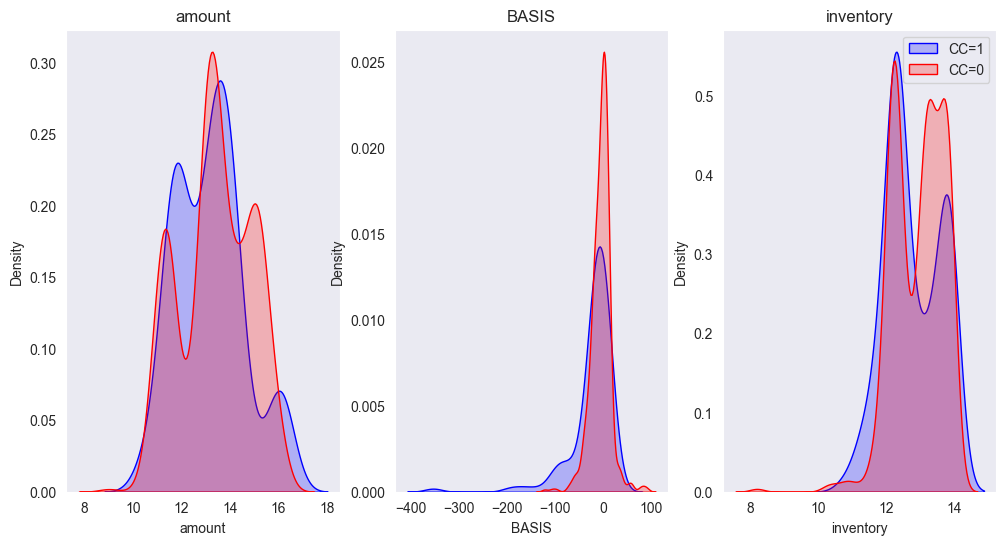

In [85]:
fig, axes = plt.subplots(1,3,figsize=(12,6))
check_cols = ["amount", "BASIS","inventory"]
sns.set_style("dark")
for i in range(len(check_cols)):
    sns.kdeplot(data=df.loc[df["CCt+1"] == 1, check_cols[i]],
                  ax=axes[i],
                  label="CC=1",
                  color='blue',
                  shade=True).set(title=check_cols[i])

    sns.kdeplot(data=df.loc[df["CCt+1"] == 0, check_cols[i]],
                  ax=axes[i],
                  label="CC=0",
                  color='red',
                  shade=True)
#legend
plt.legend()

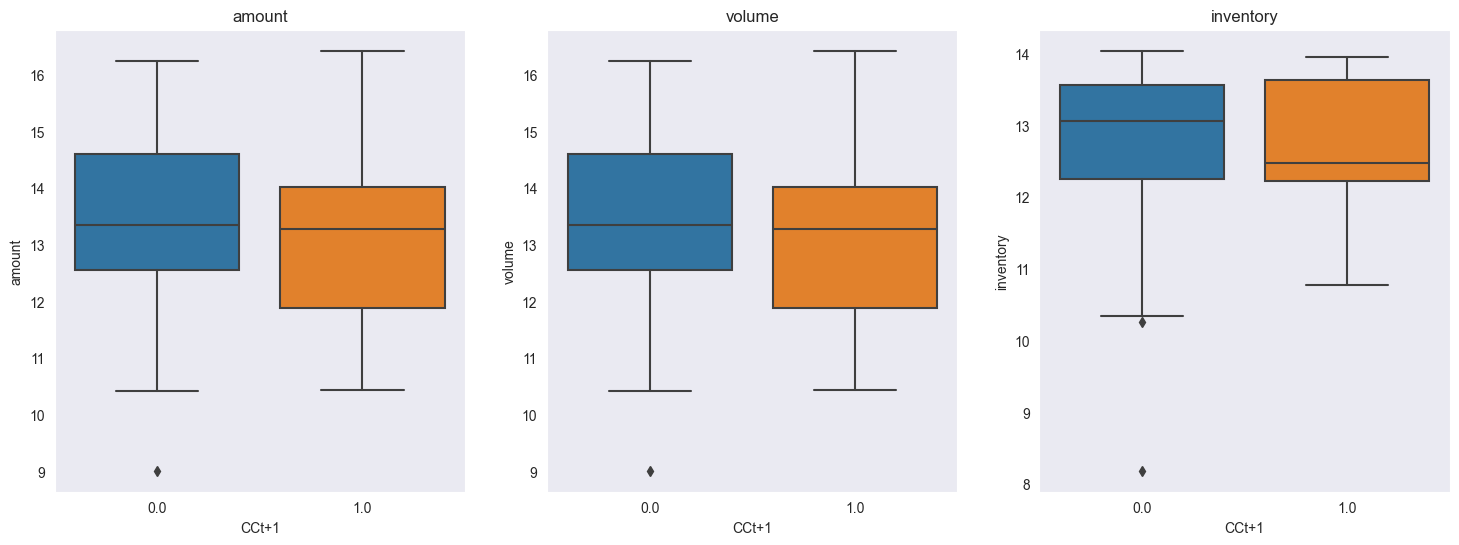

In [86]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["amount", "volume", "inventory"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

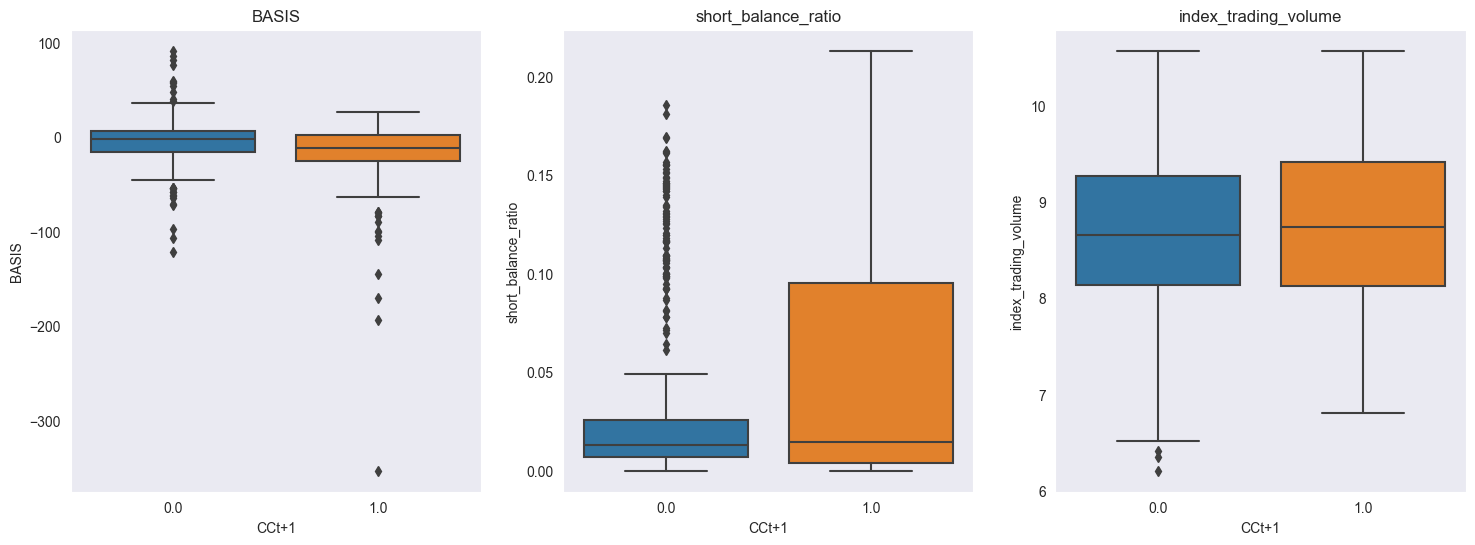

In [87]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["BASIS", "short_balance_ratio", "index_trading_volume"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

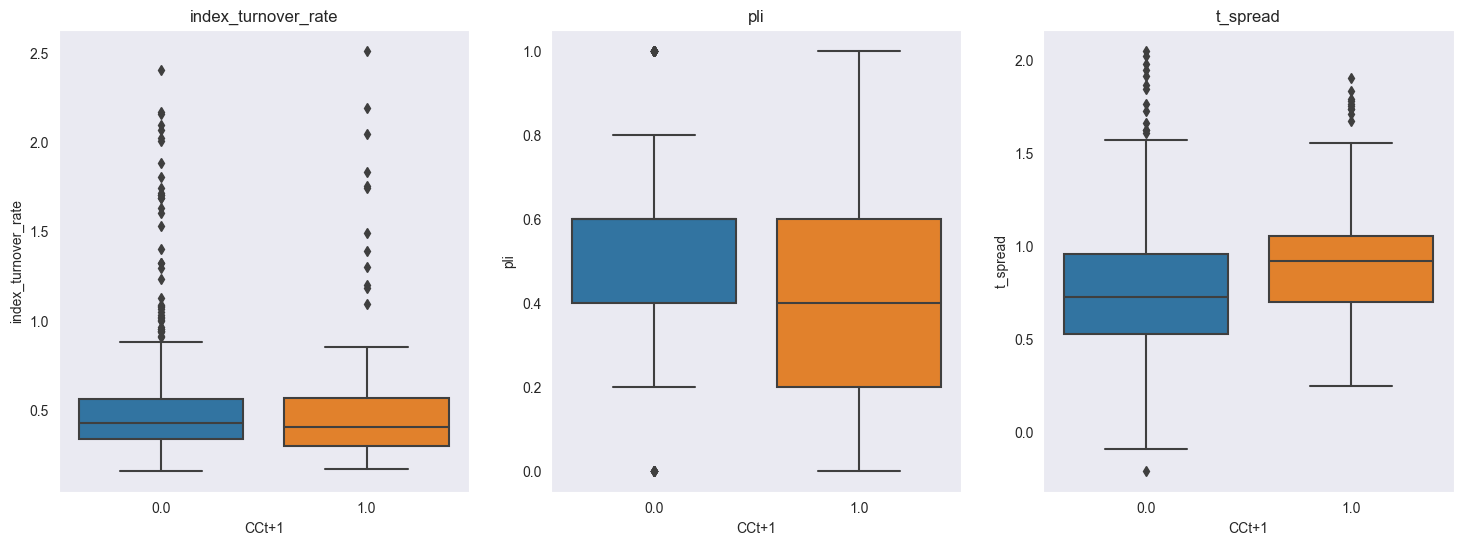

In [88]:
fig, axes = plt.subplots(1,3,figsize=(18,6)) 
check_cols = ["index_turnover_rate", "pli", "t_spread"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])

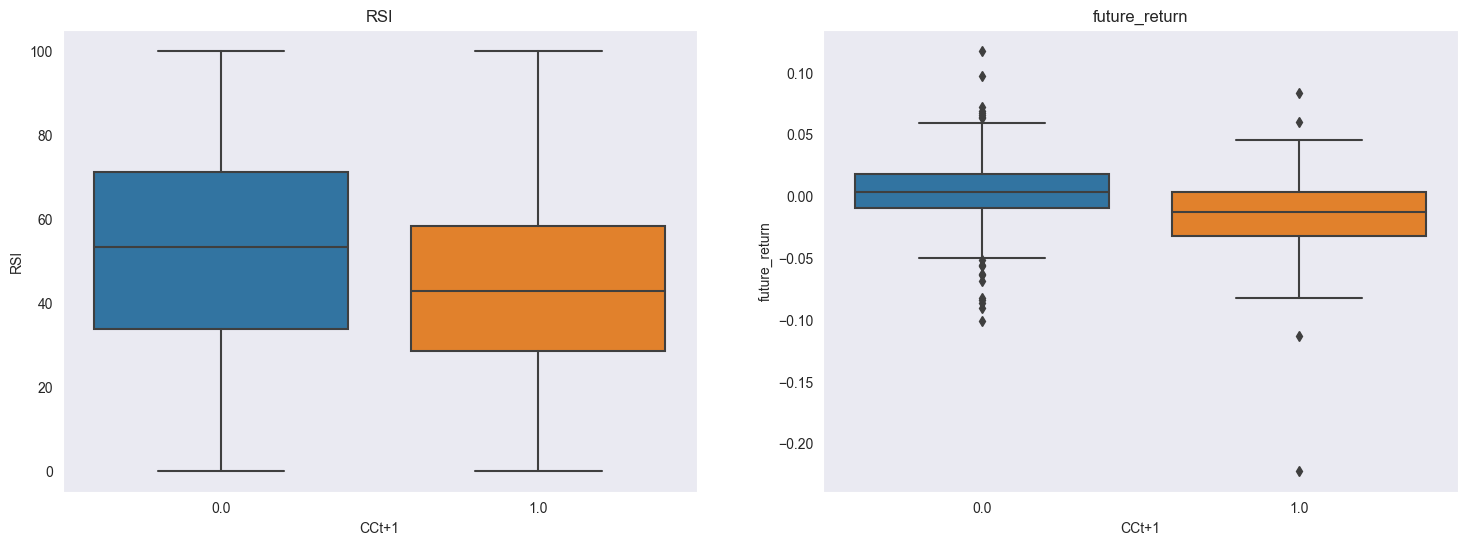

In [89]:
fig, axes = plt.subplots(1,2,figsize=(18,6)) 
check_cols = ["RSI", "future_return"]
for i in range(len(check_cols)):
    sns.boxplot(x='CCt+1', y= check_cols[i], data=df,ax=axes[i]).set(title=check_cols[i])